In [56]:
print("hello word ")

hello word 


In [1]:
# librairies 
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

Using TensorFlow backend.


IMPORT DES DONNEE

In [31]:
# import du dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [60]:
# visualisation des des classes quit composent notre dataset 
import numpy as np 
print("nos chiffres sont classées par :",np.unique(y_train))


nos chiffres sont classées par :[0 1 2 3 4 5 6 7 8 9]


VISUALISATION DU DATASET

(10000, 28, 28, 1)


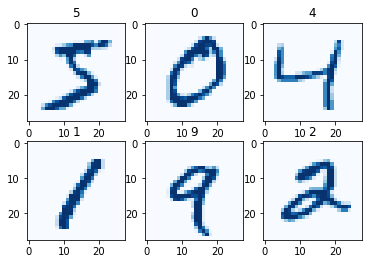

In [36]:
# Visualisation de certains chifre 
import matplotlib.pyplot as plt
# il nous faut redim notre x_train 
x_train=x_train.reshape(x_train.shape[0], 28, 28)
for t in range(0,6):
    plt.subplot((230 + (t+1)))  # ici 230 = 2 nb de ligne ,3 nb de colone ,4 0 index 
    plt.imshow(x_train[t],cmap=plt.get_cmap('Blues'))
    plt.title(y_train[t])

# ON va aussi redim  notre x_test
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(np.shape(x_test))
    

In [37]:
# on va redim le x_test et le x_train 
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.reshape(x_train.shape[0], 28, 28,1)

In [38]:
# normalisation et standardisation 
m = x_train.mean()
s = x_train.std()
std=(x_train-m)/s

PREPARATION DU DATASET

In [39]:
# Préparation du dataset
from keras.utils import np_utils
#from keras.utils.visualize_util import plot
# filtre
nb_filtre = 32
# Pooling
pool_taille = (2, 2)
# Kernel
kernel_taille = (3, 3) 
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Mise en oeuvre CONVULTIONAL NEURONE NETWORK

In [40]:


# Convultionnal neural network
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
input_shape=28 ,28 ,1
model = Sequential()
model.add(Convolution2D(nb_filtre, kernel_taille[0], kernel_taille[1], border_mode='valid',
input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filtre, kernel_taille[0], kernel_taille[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_taille))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

COMPILATION

In [41]:
#  compilation 
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

TRAININGS

In [54]:
# Entrainement du model 
batch_size = 128
nb_epoch = 1
model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(x_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1519 - accuracy: 0.9581 - val_loss: 0.0519 - val_accuracy: 0.9839


EVALUATION

In [61]:
# Evaluation

from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
score = model.evaluate(x_test, Y_test, verbose=0)
print ("Test Metrics:"), (model.metrics_names, score)
#plot_model(model, to_file='s7.png', show_shapes=True)

Test Metrics:


(None, (['loss', 'accuracy'], [0.05185744024440355, 0.9839000105857849]))